Docker/Singularity containers are the preferable way to run PyNets, but for demonstration purposes, let's just begin with a virtual environment installation and run the workflow manually on some example data. The scope of this particular tutorial will only cover single-subject workflows. Later tutorials will demonstrate how you can deploy PyNets for group analysis and across entire BIDS datasets in a single command-line interface (CLI) call.

# Installation

In [1]:
%%bash

# Start a virtual environment
pip install virtualenv --user
mkdir ~/virtualenvironment 2>/dev/null
virtualenv ~/virtualenvironment/pynets
cd ~/virtualenvironment/pynets/bin
source activate
./pip3 install -U gdown pynets

Using base prefix '/usr/local/anaconda3'
New python executable in /Users/derekpisner/virtualenvironment/pynets/bin/python
Installing setuptools, pip, wheel...
done.
Requirement already up-to-date: gdown in /Users/derekpisner/virtualenvironment/pynets/lib/python3.7/site-packages (3.11.1)
Requirement already up-to-date: pynets in /Users/derekpisner/virtualenvironment/pynets/lib/python3.7/site-packages (0.9.999)


# Fetch sample preprocessed data

And now we can download a minimal dataset from OASIS that includes preprocessed, multimodal fMRI and dMRI data.

In [2]:
%%bash

# Download preprocessed multimodal dataset (OASIS)
if  [ -d ~/Downloads/.pynets ]; then
    rm -rf ~/Downloads/.pynets/test_oasis*
else
    mkdir ~/Downloads/.pynets
fi

if  [ ! -f ~/Downloads/.pynets/test_oasis.tar.gz ]; then
    cd ~/Downloads/.pynets
    gdown https://drive.google.com/uc?id=1beEoc_Pdk6OBDYc80mBDTvUhcUny9Gu3 -O ~/Downloads/.pynets/test_oasis.tar.gz
fi
cd ~/Downloads/.pynets
mkdir ~/Downloads/.pynets/derivatives/sub-OAS31172 2>/dev/null
tar -xzvf test_oasis.tar.gz -C derivatives/sub-OAS31172

Downloading...
From: https://drive.google.com/uc?id=1beEoc_Pdk6OBDYc80mBDTvUhcUny9Gu3
To: /Users/derekpisner/Downloads/.pynets/test_oasis.tar.gz
230MB [00:24, 9.38MB/s]
x ses-d0407/func/sub-OAS31172_ses-d0407_task-rest_run-01_bold.nii.gz
x ses-d0407/anat/sub-OAS31172_ses-d0407_T2w.nii.gz
x ses-d1717/dwi/sub-OAS31172_ses-d1717_run-02_dwi.bval
x ses-d1717/swi/sub-OAS31172_ses-d1717_part-phase_GRE.json
x ses-d0407/anat/sub-OAS31172_ses-d0407_acq-TSE_T2w.json
x ses-d1717/dwi/sub-OAS31172_ses-d1717_run-02_dwi.bvec
x ses-d1717/swi/sub-OAS31172_ses-d1717_minIP.json
x ses-d1717/swi/sub-OAS31172_ses-d1717_swi.nii.gz
x ses-d1717/dataset_description.json
x ses-d0407/func/sub-OAS31172_ses-d0407_task-rest_run-02_bold.json
x ses-d1717/dwi/sub-OAS31172_ses-d1717_run-01_dwi.bval
x ses-d1717/swi/sub-OAS31172_ses-d1717_part-mag_GRE.nii.gz
x ses-d1717/dwi/sub-OAS31172_ses-d1717_run-01_dwi.bvec
x ses-d1717/func/sub-OAS31172_ses-d1717_task-rest_run-01_bold.json
x ses-d1717/anat/sub-OAS31172_ses-d1717_T2sta

# Functional Connectometry

In [3]:
%%bash
# Get the absolute paths to files and directories we will use. The CLI's in PyNets do NOT accept relative paths.
dir=~/Downloads/.pynets
abs_dir=`echo "$(dirname $dir)"`

# Now we create an output directory for the derivatives of the pipeline (if one doesn't exist already).
mkdir ~/Downloads/.pynets/output 2>/dev/null

# And now we construct a command-line call for a single subject from the data we just downloaded.
# Namely, for run 1 of session d0407 from subject OAS31172, lets sample an ensemble of 96 connectome estimates (2 models x 6 thresholds x 2 smoothing values x 2 high-pass filter thresholds x 2 atlases x 2 time-series extraction methods). 
pynets "$abs_dir"/.pynets/outputs -mod 'partcorr' 'corr' -min_thr 0.20 -max_thr 0.80 -step_thr 0.10 -sm 0 4 -hp 0 0.028 -a 'BrainnetomeAtlasFan2016' 'DesikanKlein2012' -es 'mean' 'variance' -anat "$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/anat/sub-OAS31172_ses-d0407_run-01_T1w.nii.gz -func "$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/func/sub-OAS31172_ses-d0407_task-rest_run-01_bold.nii.gz -id OAS31172_d0407_1 -plug 'MultiProc' -work '/tmp/pynets_work' -mst -plt




PyNets Version:
0.9.993


2020-06-29 01:01:21





------------------------------------------------------------------------

Running workflow for single subject:
sub-OAS31172_ses-d0407_run-1

Using whole-brain pipeline...

Using parcels as nodes...

Applying smoothing to node signal at multiple FWHM mm values: 0, 4...

Applying high-pass filter to node signal at multiple Hz values: 0, 0.028...

Extracting node signal using multiple strategies: mean, variance...

Iterating graph estimation across multiple connectivity models: partcorr, corr...

Iterating functional connectometry across multiple predefined atlases...
BrainnetomeAtlasFan2016
DesikanKlein2012

Running fmri connectometry only...
BOLD Image: /Users/derekpisner/Downloads/.pynets/derivatives/sub-OAS31172/ses-d0407/func/sub-OAS31172_ses-d0407_task-rest_run-01_bold.nii.gz
T1-Weighted Image:
/Users/derekpisner/Downloads/.pynets/derivatives/sub-OAS31172/ses-d0407/anat/sub-OAS31172_ses-d0407_run-01_T1w.nii.gz

-------------------

I0629 01:09:37.671797 4550948288 nodes.py:533] [Node] Finished "wf_single_sub_sub-OAS31172_ses-d0407_run-1_fmri_20200629_010121.meta_wf_sub-OAS31172_ses-d0407_run-1.fmri_connectometry_sub-OAS31172_ses-d0407_run-1.register_node".
I0629 01:11:01.081912 4550948288 nodes.py:442] [Node] Setting-up "wf_single_sub_sub-OAS31172_ses-d0407_run-1_fmri_20200629_010121.meta_wf_sub-OAS31172_ses-d0407_run-1.fmri_connectometry_sub-OAS31172_ses-d0407_run-1.join_iters_get_conn_matrix_node" in "/private/tmp/pynets_work/sub-OAS31172_ses-d0407_run-1_20200629_010122_c247b2b2-9e0d-44dc-b41e-75e5486894ed_wf_single_subject_fmri_sub-OAS31172_ses-d0407_run-1/wf_single_sub_sub-OAS31172_ses-d0407_run-1_fmri_20200629_010121/meta_wf_sub-OAS31172_ses-d0407_run-1/fmri_connectometry_sub-OAS31172_ses-d0407_run-1/_atlas_DesikanKlein2012/2940e7ce890c398c1e12365c458bc797367a8f9b/_thr_0.3/join_iters_get_conn_matrix_node".
I0629 01:11:01.188295 4550948288 nodes.py:739] [Node] Running "join_iters_get_conn_matrix_node" ("nipyp

# Viewing outputs

In [14]:
%%bash
cd ~/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func
ls

tree

BrainnetomeAtlasFan2016
DesikanKlein2012
mean_global_topology_distribution_multiplot.png
summary
.
├── BrainnetomeAtlasFan2016
│   ├── BrainnetomeAtlasFan2016_tmp_reor-RAS_res-2mm.nii.gz
│   ├── figures
│   │   ├── coords_plotting.pkl
│   │   ├── labelnames_plotting.pkl
│   │   ├── sub-OAS31172_ses-d0407_run-1_modality-func_est-corr_nodetype-parc_extract-mean__thr-0.2_adj_mat.png
│   │   ├── sub-OAS31172_ses-d0407_run-1_modality-func_est-corr_nodetype-parc_extract-mean__thr-0.2_adj_mat_comm.png
│   │   ├── sub-OAS31172_ses-d0407_run-1_modality-func_est-corr_nodetype-parc_extract-mean__thr-0.3_adj_mat.png
│   │   ├── sub-OAS31172_ses-d0407_run-1_modality-func_est-corr_nodetype-parc_extract-mean__thr-0.3_adj_mat_comm.png
│   │   ├── sub-OAS31172_ses-d0407_run-1_modality-func_est-corr_nodetype-parc_extract-mean__thr-0.4_adj_mat.png
│   │   ├── sub-OAS31172_ses-d0407_run-1_modality-func_est-corr_nodetype-parc_extract-mean__thr-0.4_adj_mat_comm.png
│   │   ├── sub-OAS31172_ses-d0407_run-1_m

Lets do a bit of quality-control to ensure, for example, that the inverse warping of the Desikan Klein atlas from template-space to native T1w anatomical space is valid.

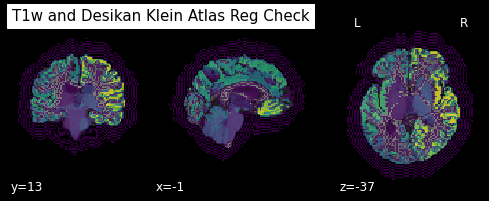

In [54]:
import nibabel as nib
from nilearn import plotting

reg_files = glob.glob('/tmp/pynets_work/*/*/meta_wf_*/fmri_connectometry*/register_node/reg/imgs/*')
t1w_brain = [i for i in reg_files if 't1w_brain.nii.gz' in i][0]
reg_atlas_files = glob.glob('/tmp/pynets_work/*_wf_single_subject_fmri*/wf_single_*/meta_wf_*/fmri_connectometry_*/_atlas_DesikanKlein2012/register_atlas_node/atlas_DesikanKlein2012/*')
atlas_in_t1w = [i for i in reg_atlas_files if '_gm.nii.gz' in i][0]

t1w_brain_img = nib.load(t1w_brain)
atlas_in_t1w_img = nib.load(atlas_in_t1w)

plt = plotting.plot_anat(t1w_brain_img, draw_cross=False, title="T1w and Desikan Klein Atlas Reg Check")
plt.add_overlay(atlas_in_t1w_img, alpha=0.75)

The below multiplot depicts distributions of average graph topological metrics, calculated using Area-Under-the-Curve (AUC) across our window of multiple thresholds, for the ensemble of 96 connectomes sampled. As you can easily discern, topology varies considerably across estimates.

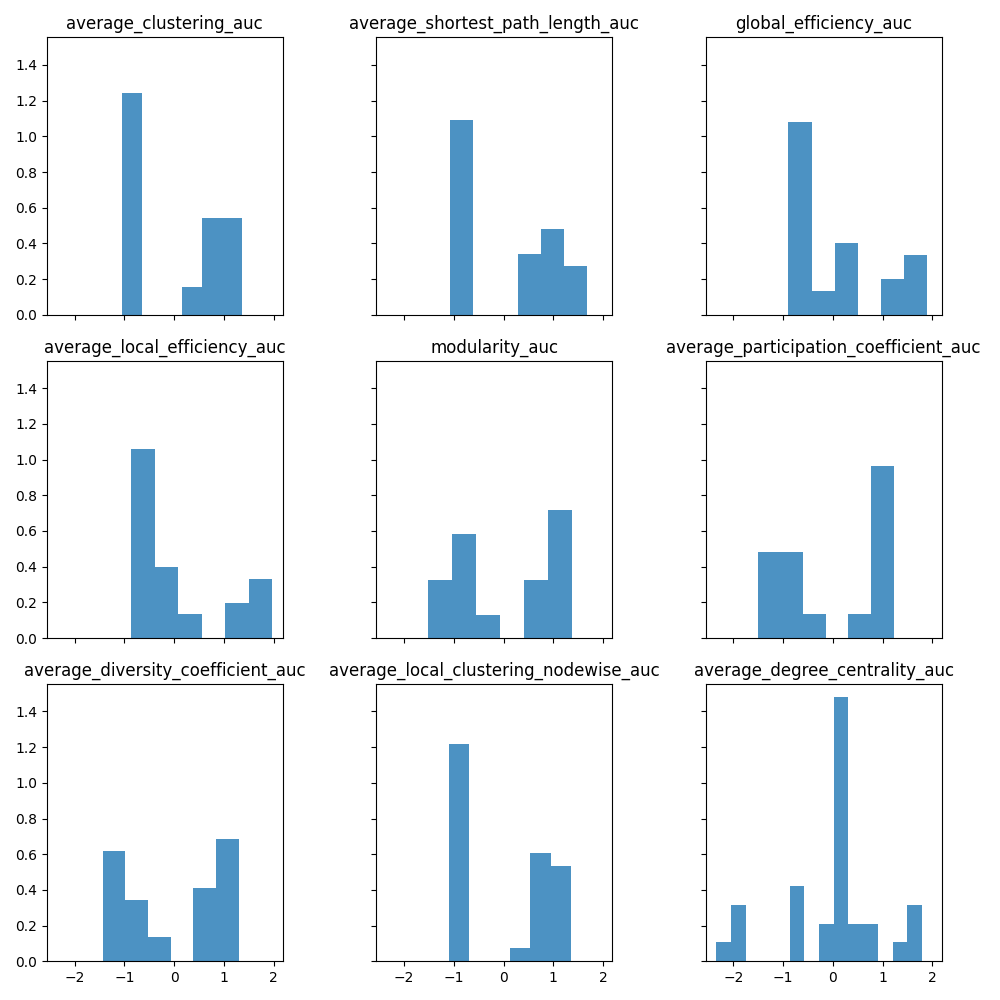

In [43]:
import glob
from IPython.display import Image
Image(filename=glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func/mean_global_topology_distribution_multiplot.png')[0])


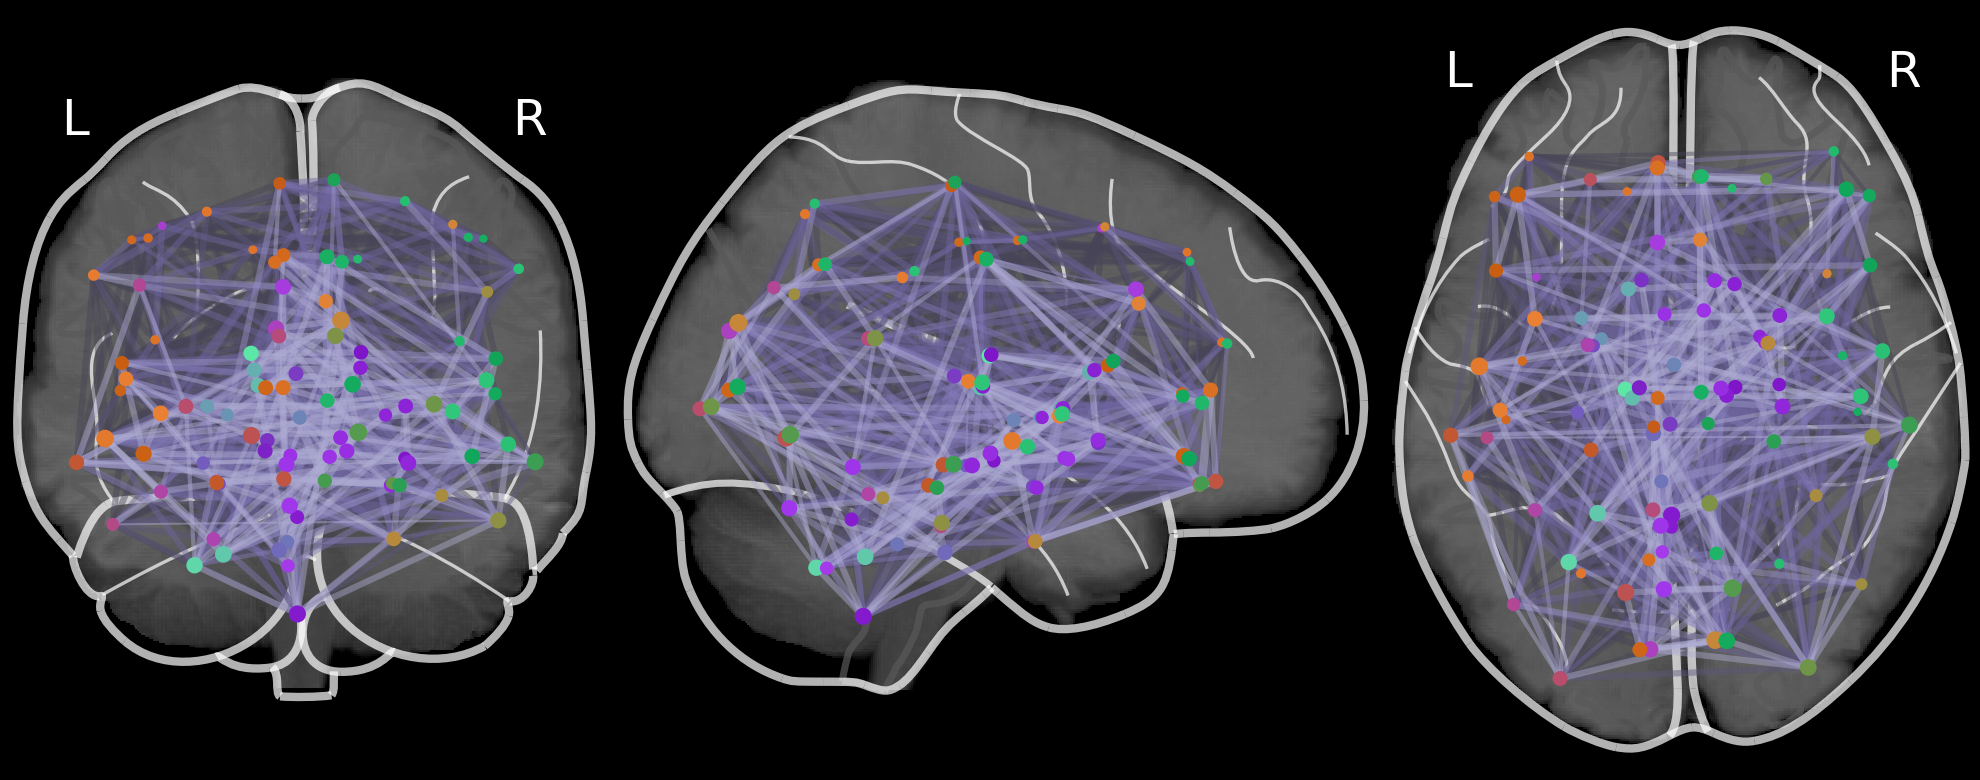

In [44]:
from IPython.display import Image
Image(filename=glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func/DesikanKlein2012/figures/sub-OAS31172_ses-d0407_run-1_modality-func_est-partcorr_nodetype-parc_smooth-4fwhm_hpass-0.028Hz_extract-variance_thr-0.2_glass_viz.png')[0]) 


Above is a glass brain depiction of all regions of the Desikan Klein 2012 atlas using a partial correlation estimatoor, 4 fwhm smoothing, 0.028Hz high-pass filter, based on variance of the node-extracted time-series, with 20% post-hoc thresholding using the Minimum-Spanning Tree (MST) method. 

In the visualization node size conveys the level of node importance (smaller is lower eigenvector centrality) and node color corresponds to hierarchical Louvain community affiliation (5 distinct communities found).

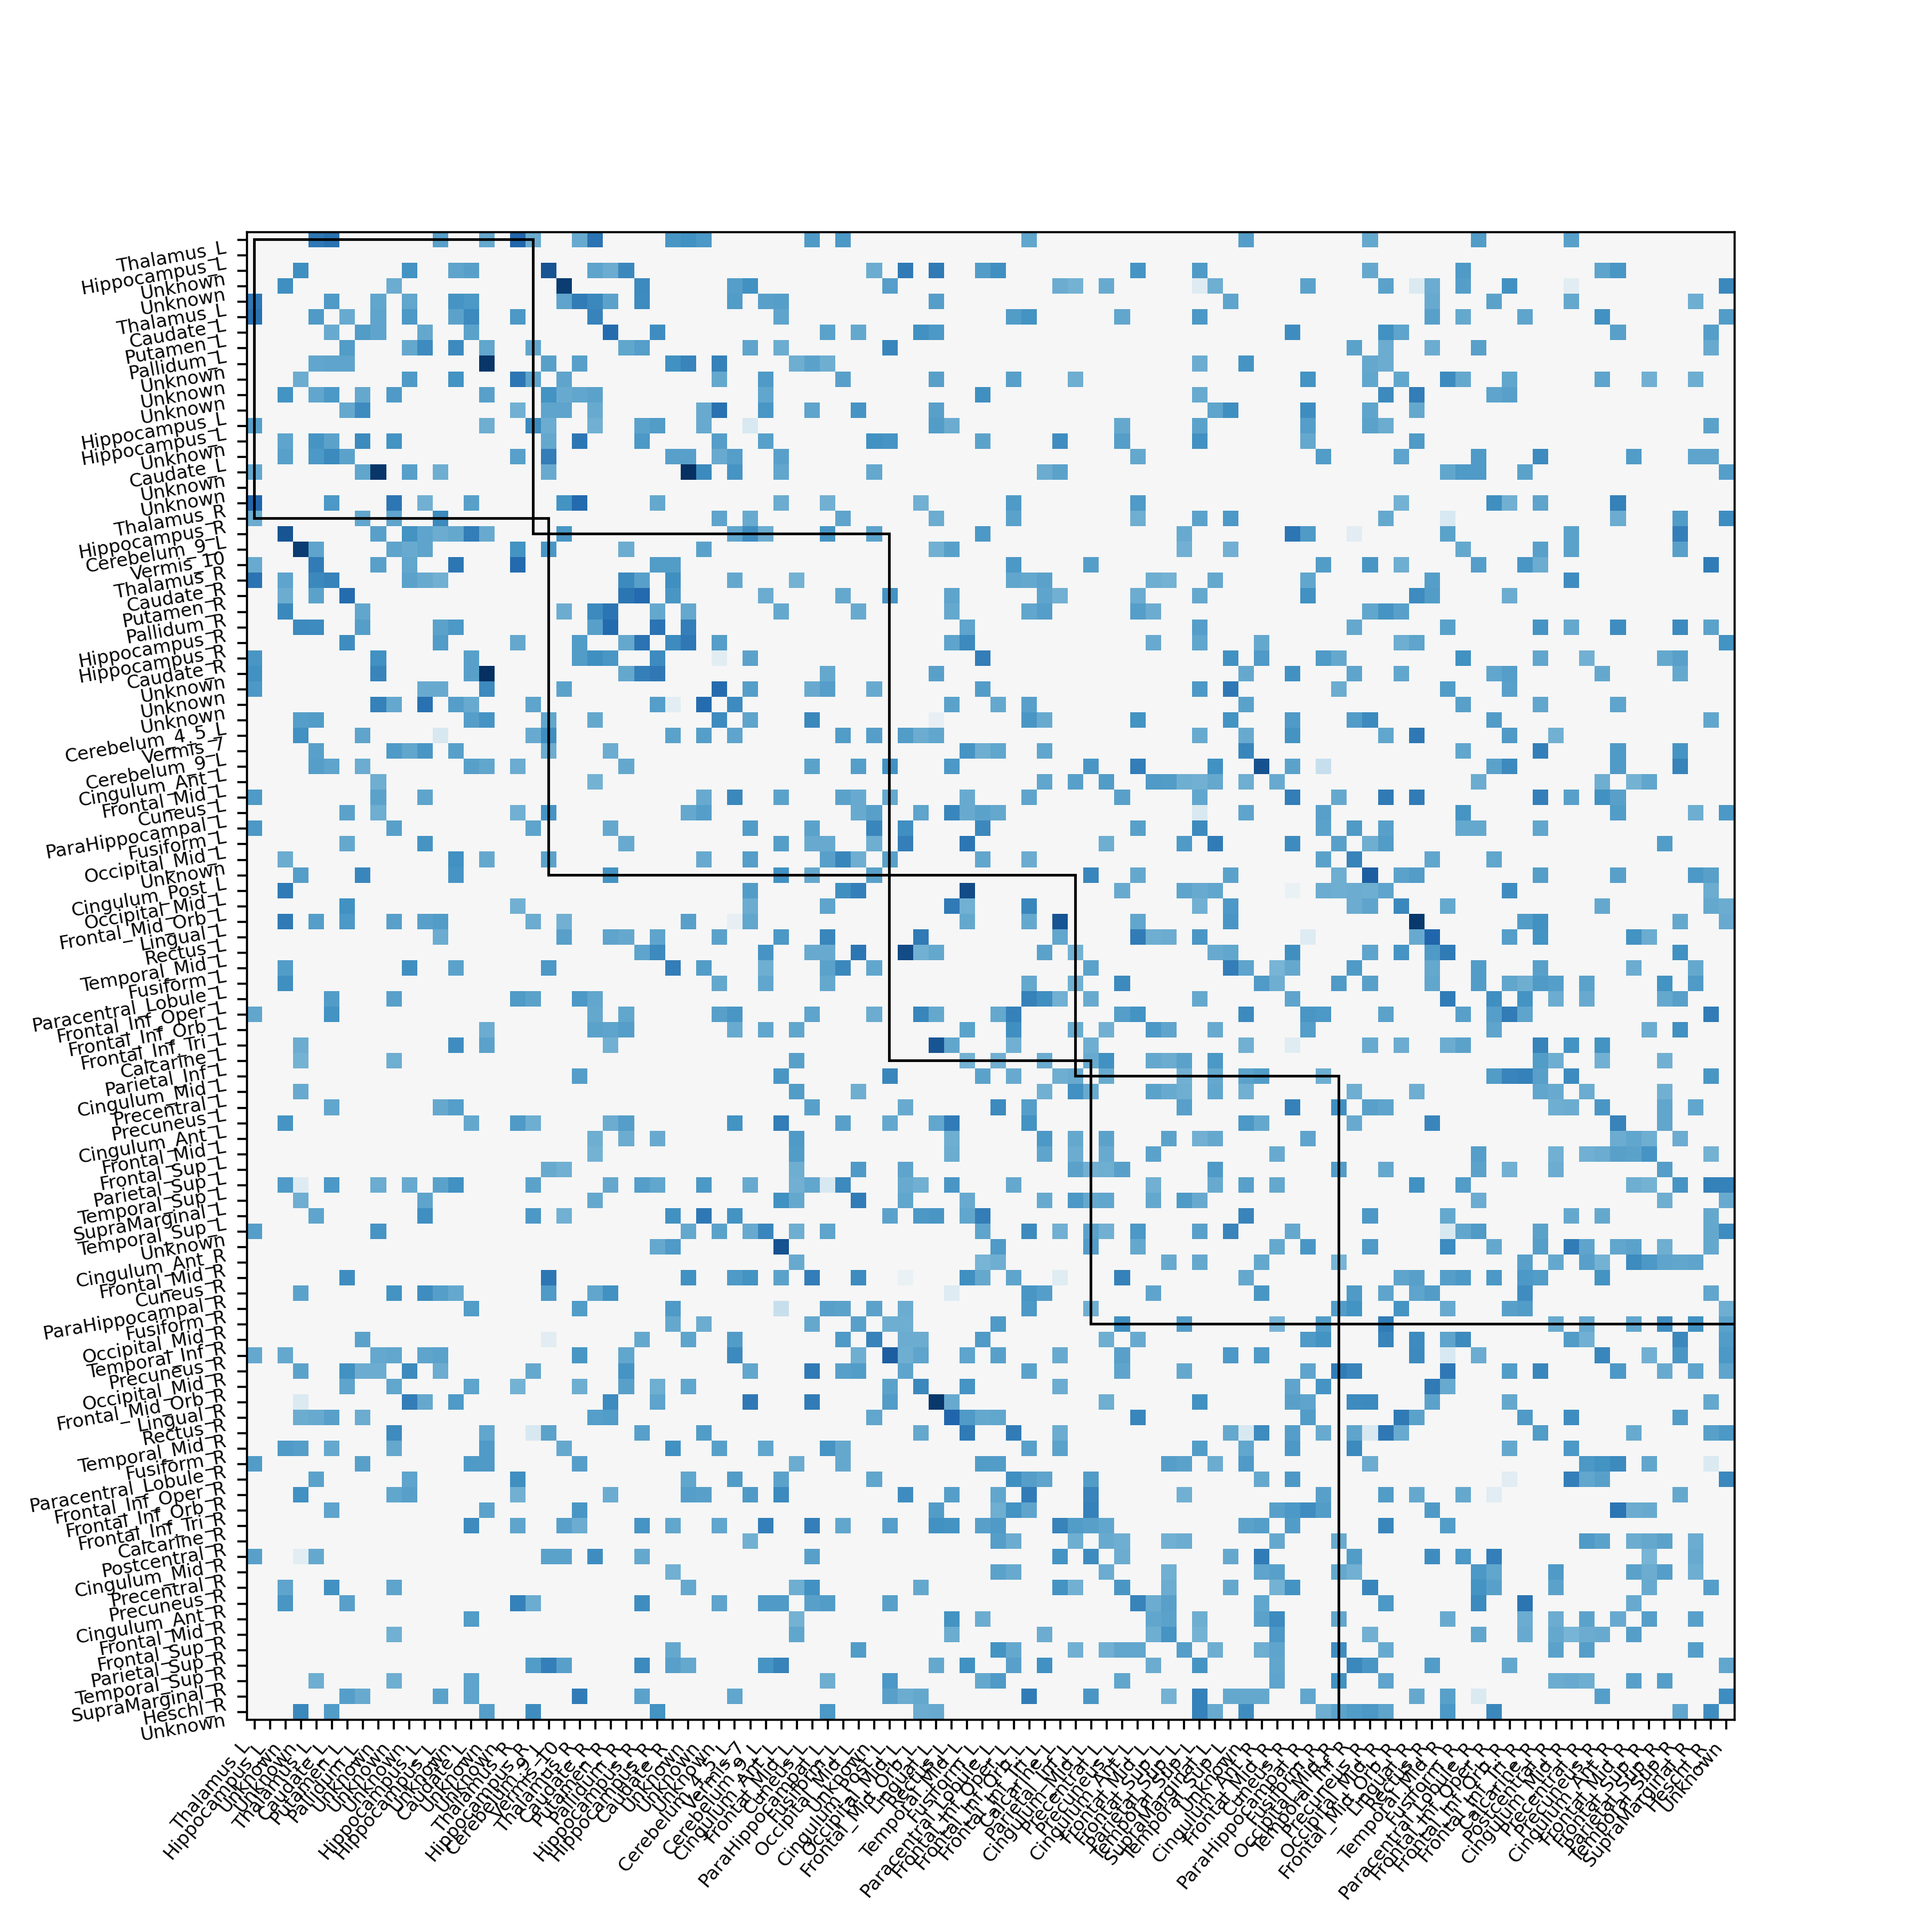

In [45]:
Image(filename=glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func/DesikanKlein2012/figures/sub-OAS31172_ses-d0407_run-1_modality-func_est-partcorr_nodetype-parc_smooth-4fwhm_hpass-0.028Hz_extract-variance__thr-0.2_adj_mat_comm.png')[0]) 


The above adjacency matrix depicts a single connectome estimate, with community affiliation. But we could also look at the mean connectome, across all 96 estimates as well:

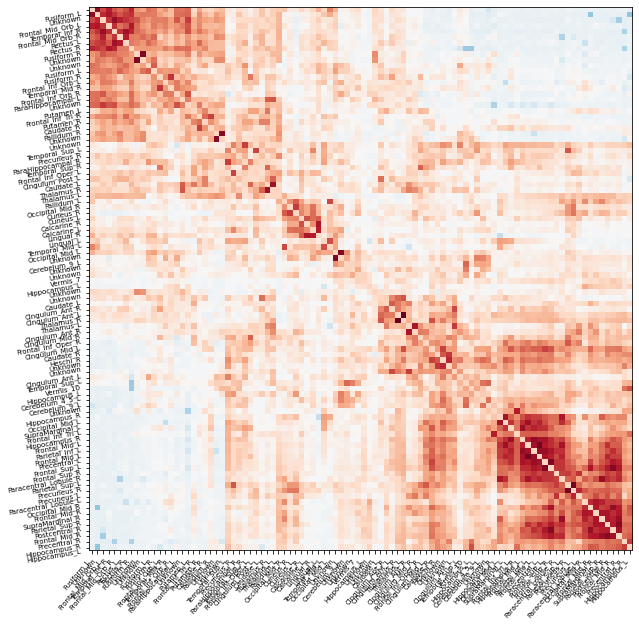

In [53]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from nilearn.plotting import plot_matrix
labels_path = glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func/DesikanKlein2012/nodes/*labels.pkl')[0]

with open(labels_path, 'rb') as f:
    labels = pickle.load(f)
    
mats = [np.load(i) for i in glob.glob('/Users/*/Downloads/.pynets/outputs/sub-OAS31172/ses-d0407/func/DesikanKlein2012/graphs/*.npy')]

mean_mat = np.mean(mats, axis=0)

plot_matrix(
    mean_mat,
    figure=(10, 10),
    labels=labels,
    vmax=np.abs(np.max(mean_mat)),
    vmin=-np.abs(np.max(mean_mat)),
    reorder="average",
    auto_fit=True,
    grid=False,
    colorbar=False,
    cmap='RdBu_r',
)

As you can see, we get a much more information-rich graph.

#Collecting Outputs
Now, we explored the outputs of our connectome ensemble visually, but let's take a closer look at the actual topological data. To do this, we run a new workflow using the pynets_collect CLI.

In [5]:
%%bash

dir=~/Downloads/.pynets
abs_dir=`echo "$(dirname $dir)"`
pynets_collect -basedir "$abs_dir"/.pynets/outputs



PyNets Version:
0.9.993


200629-15:44:25,530 nipype.workflow INFO:
	 Generated workflow graph: /tmp/work/pynets_out_collection/load_pd_dfs/graph.png (graph2use=colored, simple_form=True).

Running with {'n_procs': 4, 'memory_gb': 8, 'scheduler': 'mem_thread'}

200629-15:44:26,442 nipype.workflow INFO:
	 Workflow load_pd_dfs settings: ['check', 'execution', 'logging', 'monitoring']
200629-15:44:26,451 nipype.workflow INFO:
	 Running in parallel.
200629-15:44:26,455 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 8.00/8.00, Free processors: 4/4.
200629-15:44:27,456 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 7.80/8.00, Free processors: 3/4.
                     Currently running:
                       * load_pd_dfs.build_subject_dict_node
200629-15:44:28,511 nipype.workflow INFO:
	 [Node] Setting-up "load_pd_dfs.build_subject_dict_node" in "/private/tmp/work/pynets_out_collection/load_pd_dfs/_sub_su

In [25]:
import pathlib
from pathlib import Path
import pandas as pd

# Now we can load a dataframe of summary topological graph metrics for the run for this particular subject.
# Note that if we were to sample connectomes from multiple subjects, the previous pynets_collect CLI would 
# simply append new rows to the dataframe per subject run.
p = str(Path('~').expanduser()) + '/Downloads/.pynets/outputs/all_subs_neat.csv'
df = pd.read_csv(p, index_col=False)
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df

id  \
0  sub-OAS31172_ses-d0407   

   _corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_betweenness_centrality_auc  \
0                                            0.00417                                                             

   _corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_clustering_auc  \
0                                           0.338546                                                 

   _corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_degree_centrality_auc  \
0                                           0.199253                                                        

   _corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_diversity_coefficient_auc  \
0                                           0.423061                                                            

   _corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_eigenvector_centrality_auc  \
0                                           0.057475                                                             

   _corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_local_clustering_nodewise_auc  \
0                                           0.538298                                                                

   _corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_local_efficiency_auc  \
0                                           1.523333                                                       

   _corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_participation_coefficient_auc  \
0                                           0.348434                                                                

   _corr_nodetype-parc_hpass-0.028Hz_extract-mean_thrtype-MST__net_mets_auc_average_shortest_path_length_auc  \
0                                           0.776377                                                           

   ...  \
0  ...   

   _partcorr_nodetype-parc_smooth-4fwhm_hpass-0Hz_extract-variance_thrtype-MST__net_mets_auc_average_clustering_auc  \
0                                           0.025703                                                                  

   _partcorr_nodetype-parc_smooth-4fwhm_hpass-0Hz_extract-variance_thrtype-MST__net_mets_auc_average_degree_centrality_auc  \
0                                           0.199303                                                                         

   _partcorr_nodetype-parc_smooth-4fwhm_hpass-0Hz_extract-variance_thrtype-MST__net_mets_auc_average_diversity_coefficient_auc  \
0                                           0.858005                                                                             

   _partcorr_nodetype-parc_smooth-4fwhm_hpass-0Hz_extract-variance_thrtype-MST__net_mets_auc_average_eigenvector_centrality_auc  \
0                                           0.062492                                                                              

   _partcorr_nodetype-parc_smooth-4fwhm_hpass-0Hz_extract-variance_thrtype-MST__net_mets_auc_average_local_clustering_nodewise_auc  \
0                                           0.248418                                                                                 

   _partcorr_nodetype-parc_smooth-4fwhm_hpass-0Hz_extract-variance_thrtype-MST__net_mets_auc_average_local_efficiency_auc  \
0                                          16.946396                                                                        

   _partcorr_nodetype-parc_smooth-4fwhm_hpass-0Hz_extract-variance_thrtype-MST__net_mets_auc_average_participation_coefficient_auc  \
0                                           0.762171                                                                                 

   _partcorr_nodetype-parc_smooth-4fwhm_hpass-0Hz_extract-variance_thrtype-MST__net_mets_auc_average_shortest_path_le

# Structural Connectometry

In [ ]:
%%bash
# Again, get the absolute paths to files and directories we will use. The CLI's in PyNets do NOT accept relative paths.
dir=~/Downloads/.pynets
abs_dir=`echo "$(dirname $dir)"`

# And now we construct a command-line call for a single subject from the data we just downloaded.
# Namely, for run 1 of session d0407 from subject OAS31172, lets sample an ensemble of 96 connectome estimates (2 models x 6 thresholds x 2 smoothing values x 2 high-pass filter thresholds x 2 atlases x 2 time-series extraction methods). 
pynets "$abs_dir"/.pynets/outputs -mod 'csd' 'csa' -min_thr 0.20 -max_thr 0.80 -step_thr 0.10 -dg 'prob' 'det' -ml 20 0 -a 'BrainnetomeAtlasFan2016' 'DesikanKlein2012' -anat ""$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/anat/sub-OAS31172_ses-d0407_run-01_T1w.nii.gz" -dwi ""$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/dwi/sub-OAS31172_ses-d0407_dwi.nii.gz" -bval ""$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/dwi/sub-OAS31172_ses-d0407_dwi.bval" -bvec ""$abs_dir"/.pynets/derivatives/sub-OAS31172/ses-d0407/dwi/sub-OAS31172_ses-d0407_dwi.bvec" -id OAS31172_d0407_1 -plug 'MultiProc' -work '/tmp/pynets_work' -mst -plt
